In [2]:
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import random

In [3]:
movies = "Cleaning_up_data/clean_movies.csv"
movies_df = pd.read_csv(movies)
del movies_df['index']
movies_df

,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors
0,Inception,2010,8.8,1,0,0,0,Christopher Nolan
1,The Matrix,1999,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski"
2,Avengers: Infinity War,2018,8.5,1,0,0,0,"Anthony Russo,Joe Russo"
3,Back to the Future,1985,8.5,1,0,0,0,Robert Zemeckis
4,"The Good, the Bad and the Ugly",1966,8.8,1,0,1,0,Sergio Leone
...,...,...,...,...,...,...,...,...
15685,Whispers: An Elephant's Tale,2000,5.0,0,0,0,1,Dereck Joubert
15686,The Ghosts of Buxley Hall,1980,6.2,0,0,0,1,Bruce Bilson
15687,The Poof Point,2001,4.7,0,0,0,1,Neal Israel
15688,Sharks of Lost Island,2013,5.7,0,0,0,1,Neil Gelinas


<function matplotlib.pyplot.show(*args, **kw)>

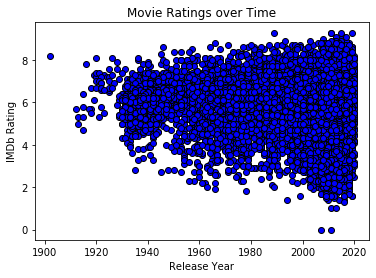

In [4]:
year = movies_df['Year']
rating = movies_df['IMDb']
plt.scatter(year, rating, facecolor = 'blue', edgecolor = 'black')
plt.ylabel('IMDb Rating')
plt.xlabel('Release Year')
plt.title('Movie Ratings over Time')

plt.savefig("PNG/movie_vs_time.png")
plt.show

In [6]:
sample_df = movies_df.sample(n=1000)

<function matplotlib.pyplot.show(*args, **kw)>

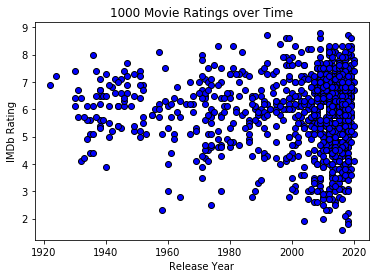

In [7]:
year = sample_df['Year']
rating = sample_df['IMDb']
plt.scatter(year, rating, facecolor = 'blue', edgecolor = 'black')
plt.ylabel('IMDb Rating')
plt.xlabel('Release Year')
plt.title('1000 Movie Ratings over Time')

plt.savefig("PNG/movie_vs_time_sample.png")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

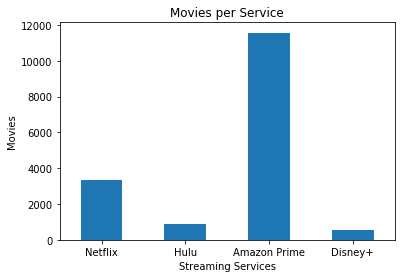

In [8]:
netflix_df = movies_df.loc[movies_df['Netflix'] == 1]
netflix = (len(netflix_df))

hulu_df = movies_df.loc[movies_df['Hulu'] == 1]
hulu = (len(hulu_df))

prime_df = movies_df.loc[movies_df['Prime Video'] == 1]
prime = (len(prime_df))

disney_df = movies_df.loc[movies_df['Disney+'] == 1]
disney = (len(disney_df))

count_df = pd.DataFrame({'Streaming Services': ['Netflix', 'Hulu', 'Amazon Prime', 'Disney+'],
                         'Count': [netflix, hulu, prime, disney]}
                       ).set_index('Streaming Services')
count_df.plot(kind='bar')
plt.xticks(rotation = 0) 
plt.legend().remove()
plt.ylabel('Movies')
plt.title('Movies per Service')

plt.savefig("PNG/movie_per_service.png")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

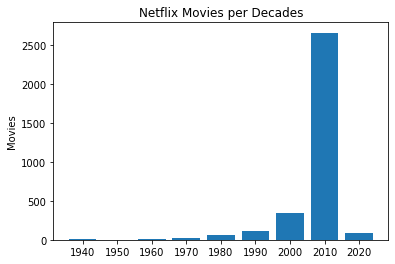

In [9]:
year_bin = [0, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2030]
year_names = ['1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020']

netflix_year_df = netflix_df[['Title', 'Year']].reset_index(inplace=False)

netflix_year_df['Decade'] = pd.cut(netflix_year_df['Year'], year_bin, labels=year_names, include_lowest=True)
netflix_bar_df = netflix_year_df.groupby('Decade').count().reset_index(inplace=False)
plt.bar(netflix_bar_df['Decade'],netflix_bar_df['Year'])
plt.ylabel('Movies')
plt.title('Netflix Movies per Decades')

plt.savefig("PNG/netflix_movie_per_dacade.png")
plt.show



In [10]:
netflix_df['Decade'] = pd.cut(netflix_df['Year'], year_bin, labels=year_names, include_lowest=True)

summary_netflix = netflix_df.groupby(['Decade']).agg({'IMDb': ['mean', 'median', 'count']})
summary_netflix = summary_netflix.dropna(how='any')
summary_netflix

C:\Users\jerod\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


IMDb             
            mean median count
Decade                       
1940    6.718182   6.60    11
1950    6.000000   6.00     1
1960    7.400000   7.00     7
1970    6.820690   7.00    29
1980    6.839062   6.85    64
1990    6.613889   6.60   108
2000    6.459366   6.50   347
2010    6.194743   6.30  2663
2020    6.230337   6.30    89

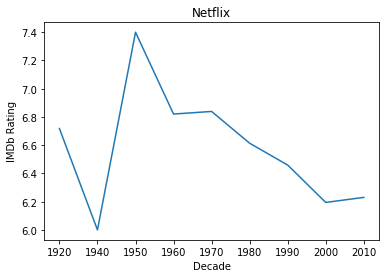

In [37]:
tick_locations = [0, 1, 2, 3, 4, 5, 6, 7, 8]
netflix_line = netflix_df.groupby(['Decade']).agg({'IMDb': ['mean']})
netflix_line = netflix_line.dropna(how='any')
netflix_line.plot()
plt.xticks(tick_locations, year_names)
plt.ylabel('IMDb Rating')
plt.legend().remove()
plt.title('Netflix')
plt.savefig('PNG/netflix_movie_ratings_time.png')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

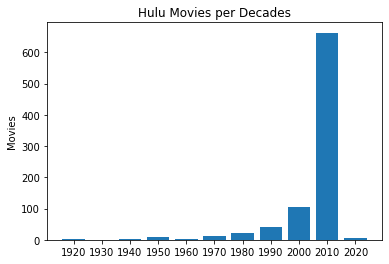

In [13]:
year_bin = [0,1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2030]
year_names = ['1920', '1930', '1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020']

hulu_year_df = hulu_df[['Title', 'Year']].reset_index(inplace=False)

hulu_year_df['Decade'] = pd.cut(hulu_year_df['Year'], year_bin, labels=year_names, include_lowest=True)
hulu_year_df = hulu_year_df.groupby('Decade').count().reset_index(inplace=False)
plt.bar(hulu_year_df['Decade'],hulu_year_df['Year'])
plt.ylabel('Movies')
plt.title('Hulu Movies per Decades')

plt.savefig("PNG/hulu_movie_per_decade.png")
plt.show


In [14]:
hulu_df['Decade'] = pd.cut(hulu_df['Year'], year_bin, labels=year_names, include_lowest=True)

summary_hulu = hulu_df.groupby(['Decade']).agg({'IMDb': ['mean', 'median', 'count']})
summary_hulu = summary_hulu.dropna(how='any')
summary_hulu

C:\Users\jerod\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


IMDb             
            mean median count
Decade                       
1920    7.300000    7.3     1
1940    7.100000    7.1     1
1950    6.612500    6.4     8
1960    7.233333    7.8     3
1970    6.900000    7.0    11
1980    6.469565    6.2    23
1990    6.288095    6.2    42
2000    6.527619    6.6   105
2010    6.029713    6.1   663
2020    5.800000    5.7     5

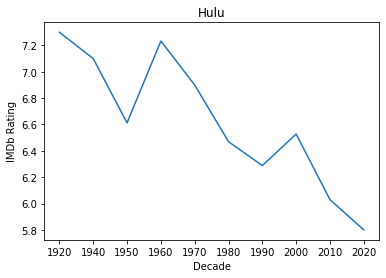

In [38]:
tick_locations = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
year_names = ['1920', '1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020']
hulu_line = hulu_df.groupby(['Decade']).agg({'IMDb': ['mean']})
hulu_line = hulu_line.dropna(how='any')
hulu_line.plot()
plt.xticks(tick_locations, year_names)
plt.ylabel('IMDb Rating')
plt.legend().remove()
plt.title('Hulu')
plt.savefig('PNG/hulu_movie_ratings_time.png')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

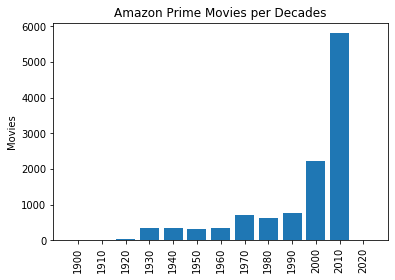

In [20]:
year_bin = [0, 1909, 1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2030]
year_names = ['1900', '1910', '1920', '1930', '1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020']

prime_year_df = prime_df[['Title', 'Year']].reset_index(inplace=False)

prime_year_df['Decade'] = pd.cut(prime_year_df['Year'], year_bin, labels=year_names, include_lowest=True)
prime_year_df = prime_year_df.groupby('Decade').count().reset_index(inplace=False)
plt.bar(prime_year_df['Decade'],prime_year_df['Year'])
plt.xticks(rotation=90)
plt.ylabel('Movies')
plt.title('Amazon Prime Movies per Decades')

plt.savefig("PNG/prime_movie_per_decade.png")
plt.show



In [21]:
prime_df["Decade"] = pd.cut(prime_df['Year'], year_bin, labels=year_names, include_lowest=True)

summary_prime = prime_df.groupby(['Decade']).agg({'IMDb': ['mean', 'median', 'count']})
summary_prime = summary_prime.dropna(how='any')
summary_prime

C:\Users\jerod\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


IMDb             
            mean median count
Decade                       
1900    8.200000   8.20     1
1910    5.928571   5.70    14
1920    6.728571   6.90    35
1930    5.781953   5.80   338
1940    6.070442   6.10   362
1950    5.926563   6.10   320
1960    5.655457   5.70   339
1970    5.869559   6.00   703
1980    5.931776   6.00   642
1990    5.879737   6.05   760
2000    5.729568   6.00  2222
2010    5.701775   5.90  5803
2020    5.721739   5.90    23

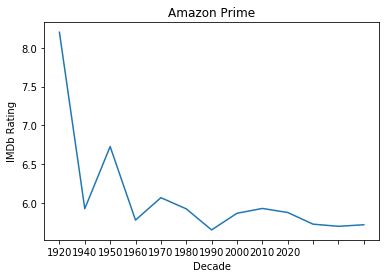

In [39]:
tick_locations = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
prime_line = prime_df.groupby(['Decade']).agg({'IMDb': ['mean']})
prime_line = prime_line.dropna(how='any')
prime_line.plot()
plt.xticks(tick_locations, year_names)
plt.ylabel('IMDb Rating')
plt.legend().remove()
plt.title('Amazon Prime')
plt.savefig('PNG/prime_movie_ratings_time.png')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

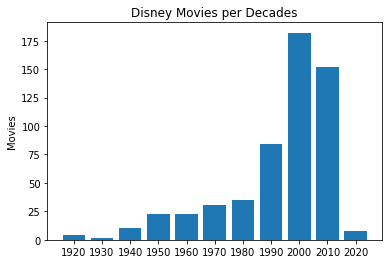

In [24]:
year_bin = [0, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2030]
year_names = ['1920', '1930', '1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020']

disney_year_df = disney_df[['Title', 'Year']].reset_index(inplace=False)

disney_year_df['Decade'] = pd.cut(disney_year_df['Year'], year_bin, labels=year_names, include_lowest=True)
disney_year_df = disney_year_df.groupby('Decade').count().reset_index(inplace=False)
plt.bar(disney_year_df['Decade'],disney_year_df['Year'])
plt.ylabel('Movies')
plt.title('Disney Movies per Decades')

plt.savefig("PNG/Disney_movie_per_decade.png")
plt.show



In [26]:
disney_df["Decade"] = pd.cut(disney_df['Year'], year_bin, labels=year_names, include_lowest=True)

summary_disney = disney_df.groupby(['Decade']).agg({'Disney+': ['mean', 'median', 'count']})
summary_disney = summary_disney.dropna(how='any')
summary_disney

C:\Users\jerod\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Disney+             
          mean median count
Decade                     
1920         1      1     4
1930         1      1     2
1940         1      1    10
1950         1      1    23
1960         1      1    23
1970         1      1    31
1980         1      1    35
1990         1      1    84
2000         1      1   182
2010         1      1   152
2020         1      1     8

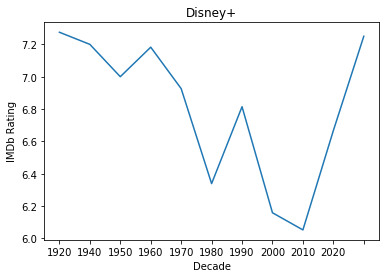

In [40]:
tick_locations = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
disney_line = disney_df.groupby(['Decade']).agg({'IMDb': ['mean']})
disney_line = disney_line.dropna(how='any')
disney_line.plot()
plt.xticks(tick_locations, year_names)
plt.ylabel('IMDb Rating')
plt.legend().remove()
plt.title('Disney+')
plt.savefig('PNG/disney_movie_ratings_time.png')
plt.show()

In [30]:
high_ratings = movies_df.loc[movies_df['IMDb']>8]
director_df = high_ratings['Directors'].value_counts().head(30).reset_index()
# print(director_df)
# for director in director_df[]:
#     top_directors = top_directors.append(high_ratings.loc[(high_ratings['Directors'] == director)])
#     print(director)
top_directors = high_ratings.loc[(high_ratings['Directors'] == 'Steven J. Santos') |
                                (high_ratings['Directors'] == 'Christopher Nolan') |
                                 (high_ratings['Directors'] == 'Hrishikesh Mukherjee') |
                                 (high_ratings['Directors'] == 'Quentin Tarantino') |
                               (high_ratings['Directors'] == 'Martin Scorsese')]


<function matplotlib.pyplot.show(*args, **kw)>

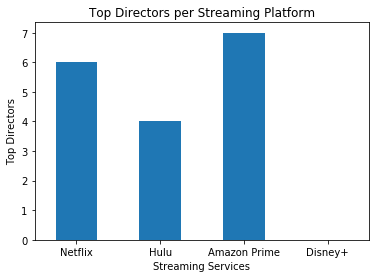

In [31]:
dnetflix_df = top_directors.loc[top_directors['Netflix'] == 1]
dnetflix = (len(dnetflix_df))

dhulu_df = top_directors.loc[top_directors['Hulu'] == 1]
dhulu = (len(dhulu_df))

dprime_df = top_directors.loc[top_directors['Prime Video'] == 1]
dprime = (len(dprime_df))

ddisney_df = top_directors.loc[top_directors['Disney+'] == 1]
ddisney = (len(ddisney_df))

dcount_df = pd.DataFrame({'Streaming Services': ['Netflix', 'Hulu', 'Amazon Prime', 'Disney+'],
                         'Count': [dnetflix, dhulu, dprime, ddisney]}
                       ).set_index('Streaming Services')
dcount_df.plot(kind='bar')
plt.ylabel('Top Directors')
plt.title('Top Directors per Streaming Platform')
plt.xticks(rotation = 0) 
plt.legend().remove()

plt.savefig("PNG/movie_rating_per_director.png")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

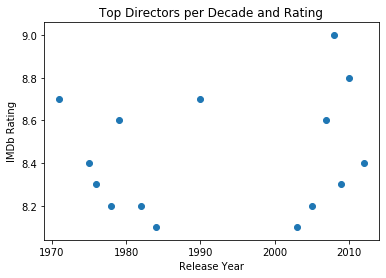

In [32]:
dyear = top_directors['Year']
drating = top_directors['IMDb']
plt.scatter(dyear, drating)
plt.ylabel('IMDb Rating')
plt.xlabel('Release Year')

plt.title('Top Directors per Decade and Rating')

plt.savefig("PNG/directos_rating_per_decade.png")
plt.show